In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from behav import plotting, utils, loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns

/home/AD/tsainbur/anaconda3/envs/cdcp_paper/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """


In [3]:
from cdcp.experiment_info import subjects
from cdcp.paths import DATA_PATH_MAGPI, DATA_DIR
from cdcp.behavior.data import prepare_behavior_data
from cdcp.visualization.colors import colors
subjects, DATA_PATH_MAGPI

(('B1174',
  'B1426',
  'B1170',
  'B1432',
  'B1437',
  'B1433',
  'B1597',
  'B1427',
  'B1188',
  'B1244'),
 PosixPath('/mnt/cube/RawData/Magpi'))

In [4]:
# pickled dataframes
interp_df = pd.read_pickle(DATA_DIR / 'interp_df.pickle')

In [5]:
# pickled dataframes
stim_df = pd.read_pickle(DATA_DIR / 'stim_df.pickle')

In [6]:
len(stim_df)

13

In [7]:
len(interp_df)

7168

In [8]:
interp_df[:3]

,L,R,prop,pt,z,x_x_interp,x_z_interp,audio
0,A,B,0.000000,0,"[1.0914186239242554, -0.4693475067615509, -1.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.042301386813051e-06, 7.268283184203028e-07,...","[-12, -8, -44, -42, -54, -38, -39, -33, -48, -..."
1,A,B,0.007874,1,"[1.070769041541993, -0.4643999143378941, -1.84...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.4460663300706074e-06, 8.483789883939608e-07...","[25, 31, 22, 15, -27, -39, -39, -52, -27, -27,..."
2,A,B,0.015748,2,"[1.050119459159731, -0.45945232191423735, -1.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.899309376720339e-06, 9.88013880487415e-07, ...","[-15, -10, 14, 44, 50, 38, 50, 46, 33, 33, 40,..."


In [9]:
L_LIST = ['A', 'B', 'C']#, 'D']
R_LIST = ['E', 'F', 'G']#, 'H']

In [10]:
n_interp = 8

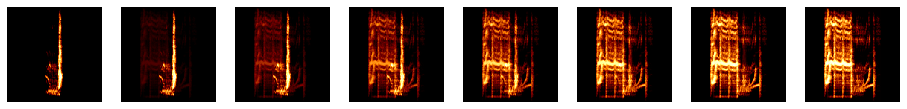

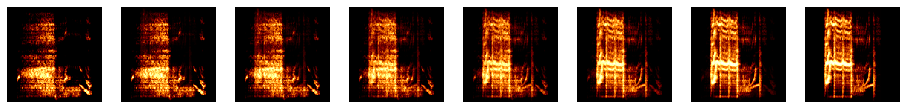

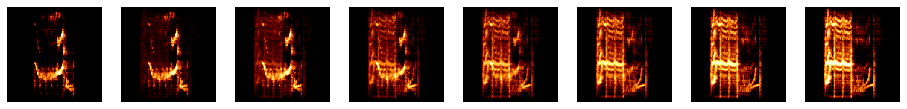

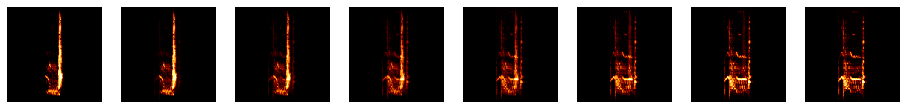

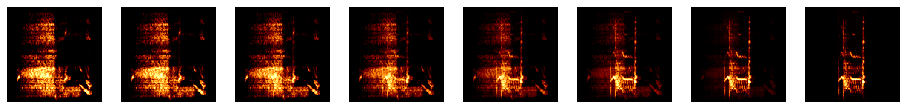

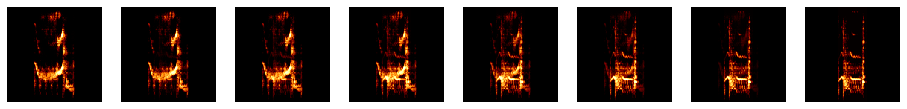

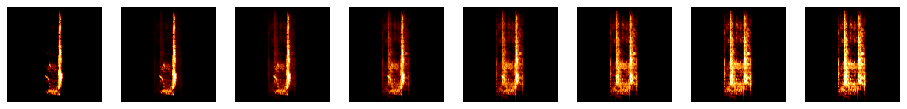

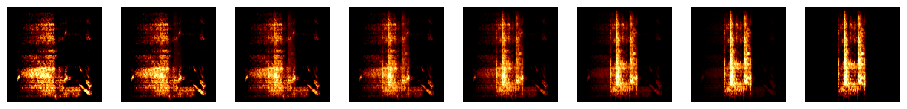

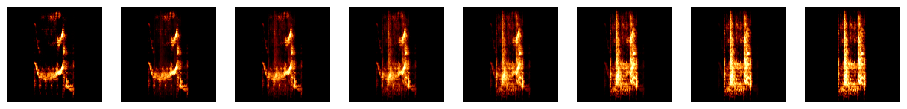

In [11]:
for L in L_LIST:
    for R in R_LIST:
        interp_df_subset = interp_df[
           (interp_df.L == L) & 
            (interp_df.R == R)
        ]
        interp_df_subset_pts = interp_df_subset[interp_df_subset.pt.isin(np.linspace(0, 127, n_interp).astype('int'))]
        
        fig, axs = plt.subplots(ncols = n_interp, figsize= (n_interp*2, 2))
        for i in range(n_interp):
            spec = np.reshape(interp_df_subset_pts.x_x_interp.values[i], (128,128))
            axs[i].matshow(spec, origin = 'lower', cmap = plt.cm.afmhot)
            axs[i].axis('off')

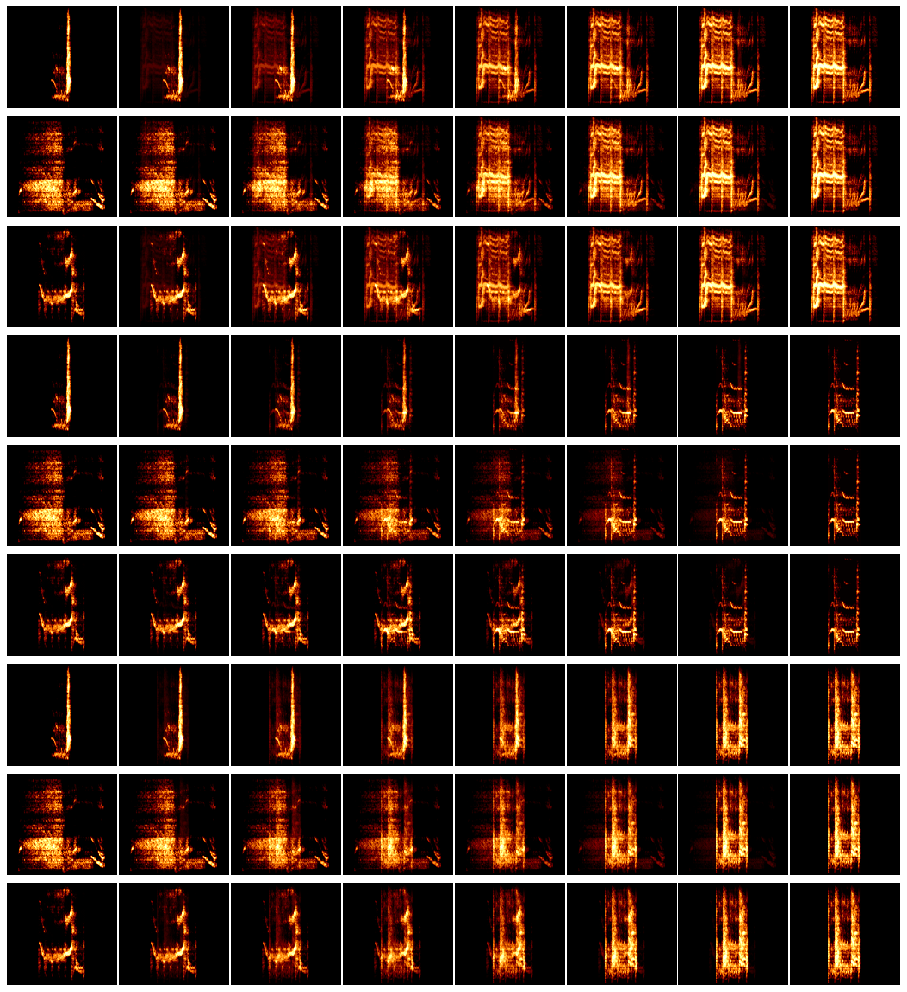

In [40]:
n_interp = 8
fig, axs = plt.subplots(
    nrows=len(L_LIST) * len(R_LIST),
    ncols=n_interp,
    figsize=(n_interp * 2, len(L_LIST) * len(R_LIST) * 2),
    gridspec_kw = {'wspace':0.02, 'hspace':0.08}
)

for li, L in enumerate(L_LIST):
    for ri, R in enumerate(R_LIST):
        interp_df_subset = interp_df[(interp_df.L == L) & (interp_df.R == R)]
        interp_df_subset_pts = interp_df_subset[
            interp_df_subset.pt.isin(np.linspace(0, 127, n_interp).astype("int"))
        ]

        for i in range(n_interp):
            ax = axs[ri + li * len(L_LIST), i]
            spec = np.reshape(interp_df_subset_pts.x_x_interp.values[i], (128, 128))
            ax.matshow(spec, origin="lower", cmap=plt.cm.afmhot, aspect = 'auto')
            ax.axis("off")

#fig.subplots_adjust(wspace=0, hspace=0)

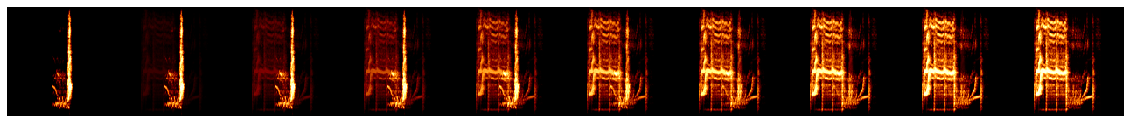

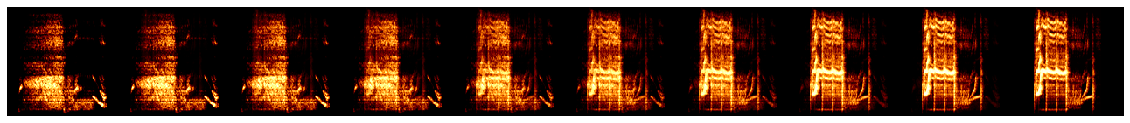

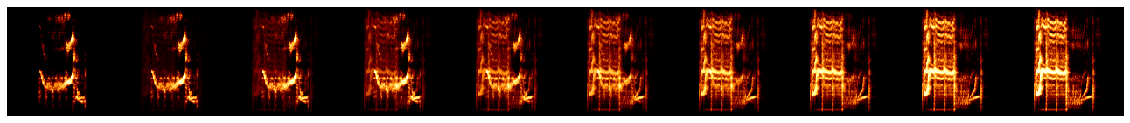

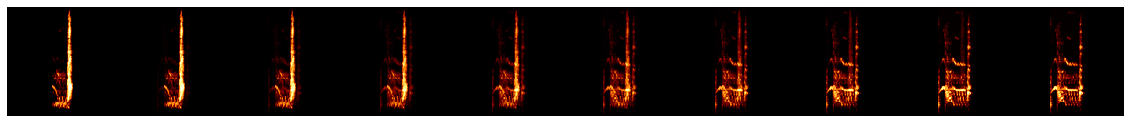

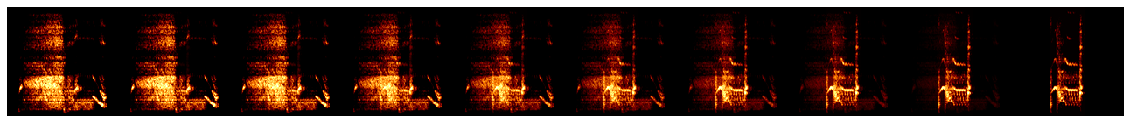

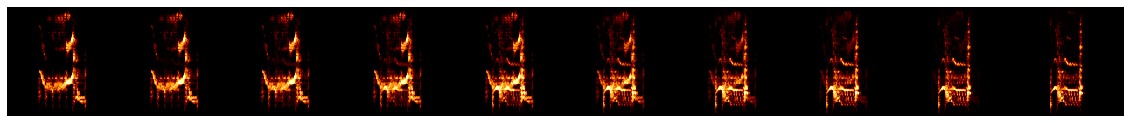

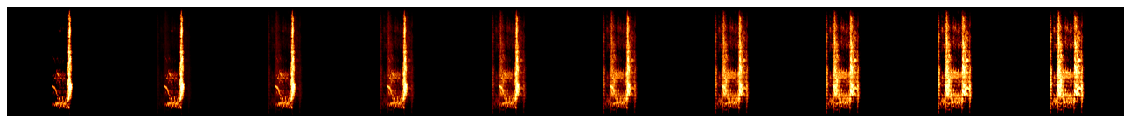

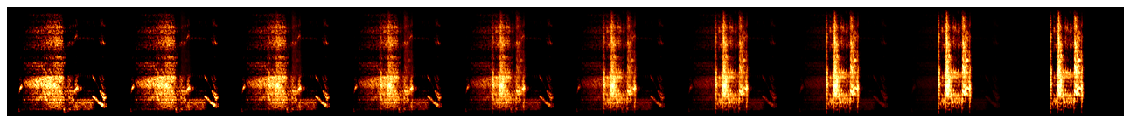

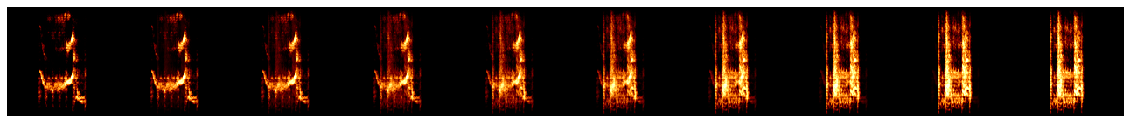

In [30]:
for L in L_LIST:
    for R in R_LIST:
        interp_df_subset = interp_df[
           (interp_df.L == L) & 
            (interp_df.R == R)
        ]
        interp_df_subset_pts = interp_df_subset[interp_df_subset.pt.isin(np.linspace(0, 127, n_interp).astype('int'))]
        
        fig, axs = plt.subplots(ncols = n_interp, figsize= (n_interp*2, 2),     gridspec_kw = {'wspace':0.0, 'hspace':0.08})
        for i in range(n_interp):
            spec = np.reshape(interp_df_subset_pts.x_x_interp.values[i], (128,128))
            axs[i].matshow(spec, origin = 'lower', cmap = plt.cm.afmhot, aspect='auto')
            axs[i].axis('off')

In [32]:
stim_df[:3]

,stims,idx,z,x,recon_x,syll_wav,wav_file,stim_length,syll_start,bird,datetime,generated_audio
A,A,0,"[-1.5310783386230469, 0.15899673104286194, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.354109710722696e-05, 2.357472340008826e-06,...","[-18, -21, -18, -19, -23, -16, -15, -24, -17, ...",../../data/interim/st_wavs/b1077/wavs/2018-01-...,0.606612,1853779.625,b1077,05/01/18 13:33:29.485819,"[6, 2, -5, -7, -12, -5, 0, 1, 13, 2, 6, 20, 24..."
B,B,1,"[1.0914186239242554, -0.4693475067615509, -1.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.042301386813051e-06, 7.268283184203028e-07,...","[-69, -71, -58, -53, -42, -45, -37, -50, -64, ...",../../data/interim/st_wavs/b1159/wavs/2018-04-...,0.311291,1481033.000,b1159,21/04/18 18:13:16.363514,"[-2, 0, -16, -54, -57, -23, -42, -44, -62, -49..."
C,C,2,"[1.3686274290084839, 1.2882750034332275, -0.63...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.574187132926454e-07, 4.783260010299273e-08,...","[22, 20, 26, 25, 15, 12, 12, 15, 15, 26, 34, 2...",../../data/interim/st_wavs/B338/wavs/2008-05-0...,0.309285,1494092.875,B338,04/05/08 18:56:33.879657,"[0, 3, 6, 0, 2, 4, 14, 19, 20, 22, 27, 28, 27,..."


A


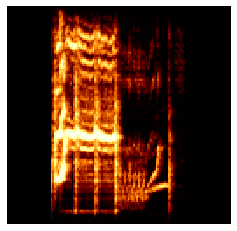

B


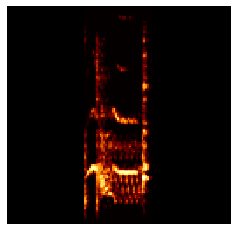

C


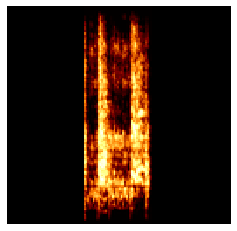

D


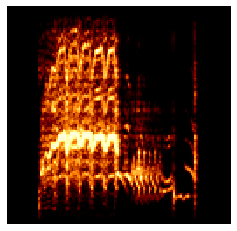

E


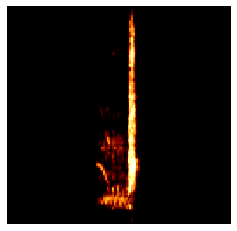

F


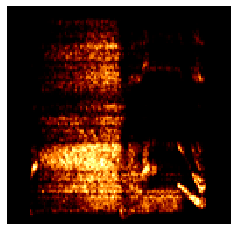

G


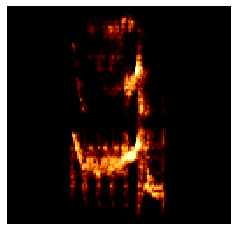

H


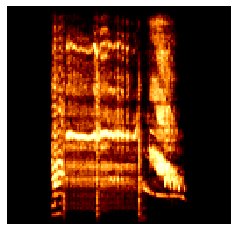

CR0


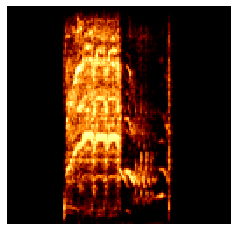

CR1


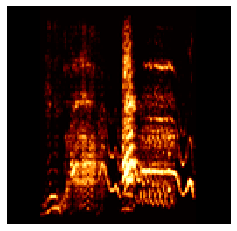

CN


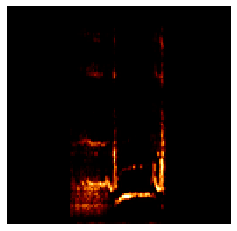

CL0


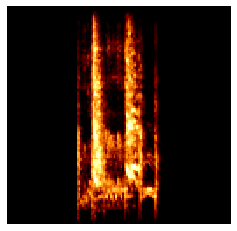

CL1


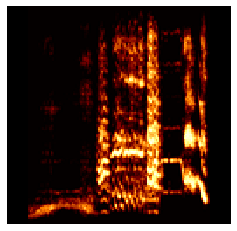

In [38]:
for idx, row in stim_df.iterrows():
    print(row.stims)
    fig, ax = plt.subplots(figsize=(4,4))
    ax.matshow(row.x.reshape(128,128), origin = 'lower', cmap = plt.cm.afmhot, aspect='auto')
    ax.axis('off')
    plt.show()

In [ ]:
for L in L_LIST:
    for R in R_LIST:
        interp_df_subset = interp_df[
           (interp_df.L == L) & 
            (interp_df.R == R)
        ]
        interp_df_subset_pts = interp_df_subset[interp_df_subset.pt.isin(np.linspace(0, 127, n_interp).astype('int'))]
        
        fig, axs = plt.subplots(ncols = n_interp, figsize= (n_interp*2, 2),     gridspec_kw = {'wspace':0.0, 'hspace':0.08})
        for i in range(n_interp):
            spec = np.reshape(interp_df_subset_pts.x_x_interp.values[i], (128,128))
            axs[i].matshow(spec, origin = 'lower', cmap = plt.cm.afmhot, aspect='auto')
            axs[i].axis('off')